# **Daegu Apartement**

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Data Analysis
5. Modeling
6. Conclusion
7. Recommendation


---

## **Business Problem Understanding**

### **Context**

Di daerah perkotaan seperti Daegu, apartemen memiliki peran yang penting dalam memenuhi kebutuhan tempat tinggal karena keterbatasan lahan perumahan dan aktivitas bisnis yang padat. Harga apartemen dipengaruhi oleh faktor internal dan eksternal, sehingga menarik untuk dilakukan eksplorasi lebih lanjut.

### **Problem Statement**

Pemilik atau penjual apartemen seringkali menghadapi kesulitan dalam menentukan harga yang optimal untuk unit mereka. Menetapkan harga terlalu tinggi dapat menyulitkan penjualan, namun menetapkan harga terlalu rendah dapat menyebabkan kehilangan peluang keuntungan. Oleh karena itu, cukup sulit bagi para pemilik apartemen untuk menentukan harga yang optimal untuk unit mereka.

### **Goals**

Berdasarkan permasalahan tersebut, dibutuhkanlah sebuah model machine learning yang dapat membantu para pemilik apartemen di Daegu dalam menentukan harga yang optimal untuk unit mereka. Model ini tentunya harus mempertimbangkan fitur-fitur yang dimiliki unit tersebut untuk memprediksi harga yang akurat. Tujuan dari model ini adalah membantu para pemilik apartemen agar dapat memaksimalkan keuntungan yang didapat dari penjualan unit mereka.

### **Analytic Approach**

Pendekatan analitik yang diusulkan melibatkan pembuatan model regresi untuk memprediksi harga apartemen berdasarkan fitur-fiturnya. Model ini akan belajar dari data historis yang dimiliki untuk dapat menemukan pola dari fitur-fitur yang ada, yang dapat membedakan satu apartemen dengan apartemen lainnya.

### **Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## **Data Understanding**

- Dataset merupakan data apartemen di kota Daegu
- Setiap baris data merepresentasikan suatu apartemen beserta informasi-informasi terkaitnya.

### **Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Hallway Type | Object | Apartment type |
| TimeToSubway | Object | Time needed to the nearest subway station |
| SubwayStation | Object | The name of the nearest subway station |
| N_FacilitiesNearBy(ETC) | Float | The number of facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | Float | The number of public office facilities nearby |
| N_SchoolNearBy(University) | Float | The number of universities nearby |
| N_Parkinglot(Basement) | Float | The number of the parking lot |
| YearBuilt | Integer | The year the apartment was built |
| N_FacilitiesInApt | Integer | Number of facilities in the apartment |
| Size(sqft) | Integer | The apartment size (in square feet) |
| SalePrice | Integer | The apartment price (Won) |

### **Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# statistics
from scipy.stats import normaltest

# train test split
from sklearn.model_selection import train_test_split

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# algoritma ML
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

# metrics untuk regresi
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### **Exploratory Data Analysis**

#### **Distribution of Daegu Apartement price**

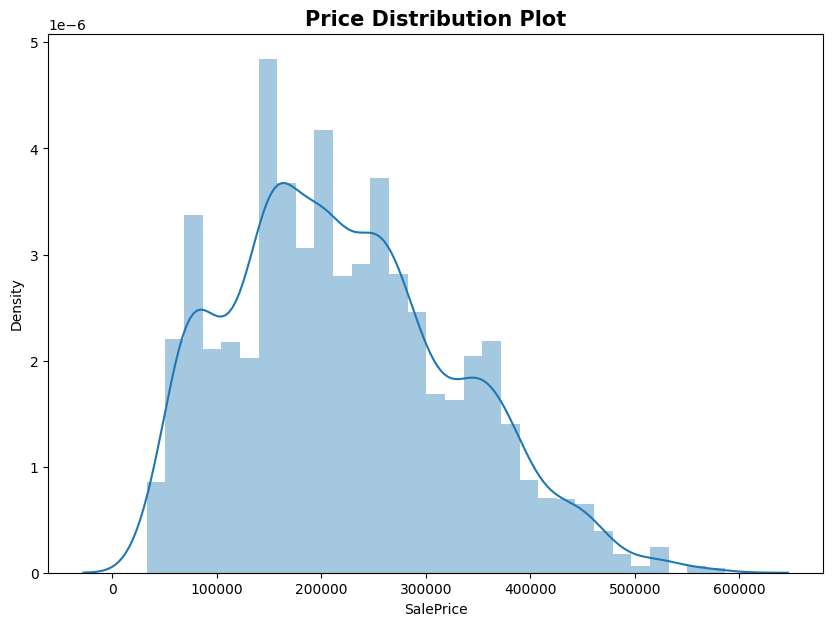

In [3]:
# Plot distribusi fitur 'SalePrice'
plt.figure(figsize=(10, 7))
sns.distplot(df['SalePrice'])
plt.title('Price Distribution Plot', size=15, weight='bold')
plt.show()

In [4]:
stat, pvalue = normaltest(df['SalePrice'])

if pvalue > 0.05:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data SalePrice terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data SalePrice TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan bahwa data SalePrice TIDAK terdistribusi normal


Berdasarkan plot distribusi dan uji statistik, dapat disimpulkan bahwa distribusi dari kolom data `SalePrice` tidak normal dan right skew.

#### **Number of apartements by numerical columns**

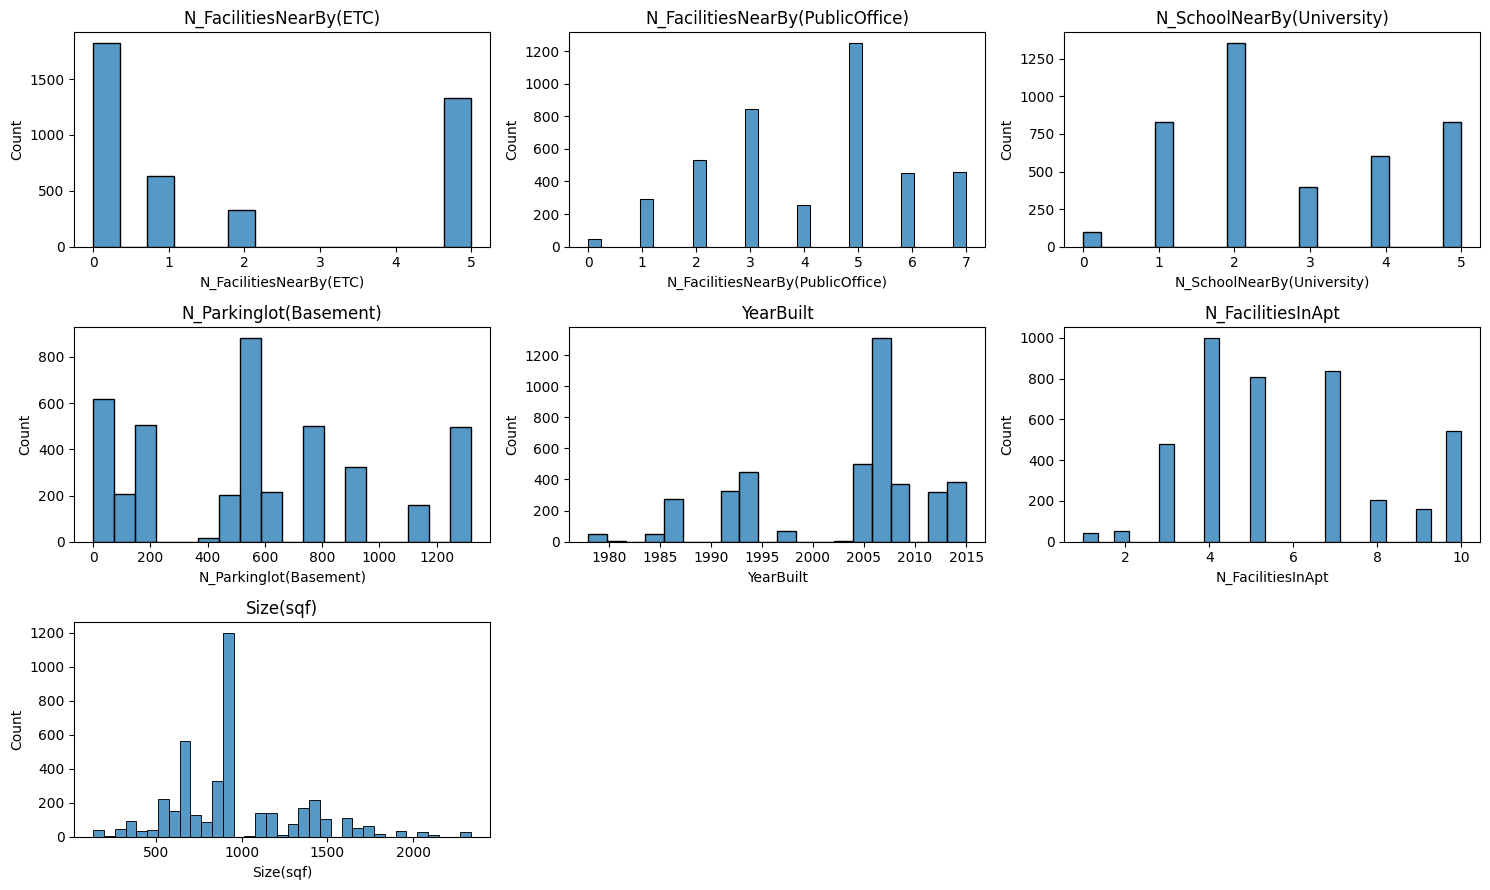

In [5]:
numerical_features = df.drop(columns= 'SalePrice').describe().columns
plt.figure(figsize= (15, 9))
ax = 1

for col in numerical_features:

    plt.subplot(3, 3, ax)
    sns.histplot(data= df, x= col)
    plt.title(f'{col}', size= 12)
    ax+= 1

plt.tight_layout()
plt.show()

Dari gambar-gambar diatas, dapat dilihat bahwa setiap kolom numerikal memiliki nilai/interval yang memiliki jumlah dominan, seperti misalnya untuk kolom `N_FacilitiesNearBy(ETC)`, data yang memiliki `N_FacilitiesNearBy(ETC)` bernilai 0 memiliki proporsi paling banyak.

#### **Number of apartements by categorical columns**

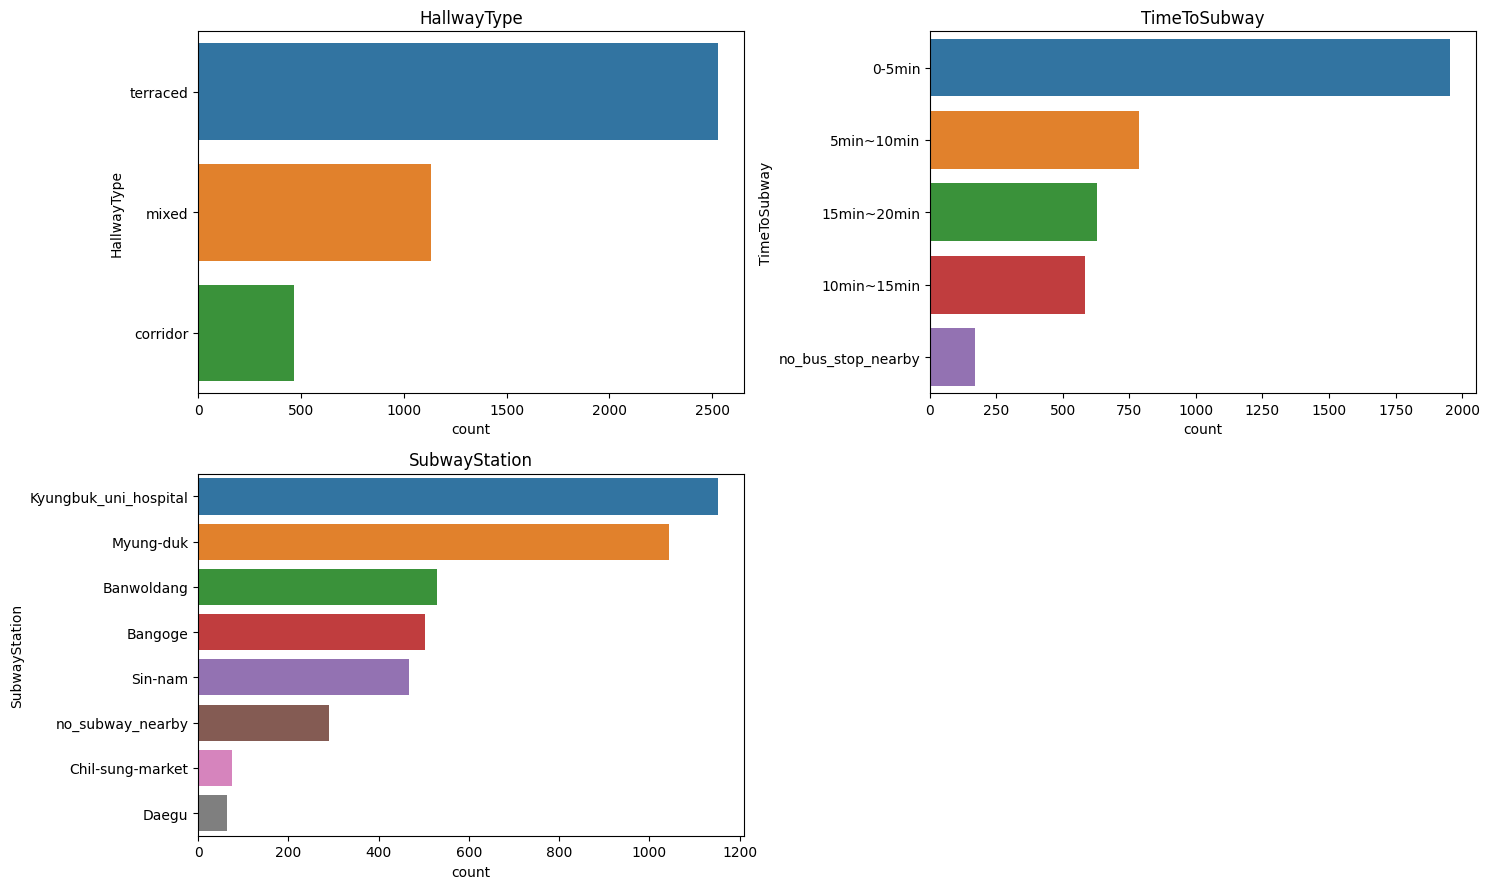

In [6]:
categorical_features = df.describe(include='O').columns
plt.figure(figsize=  (15, 9))
ax = 1

for col in categorical_features:

    plt.subplot(2, 2, ax)
    sns.countplot(data=df, y= col, order=df[col].value_counts().index)
    plt.title(f'{col}', size= 12)
    ax += 1

plt.tight_layout()
plt.show()

Dari 3 gambar diatas dapat disimpulkan:
- Data yang memiliki `HallwayType` bertipe terraced memiliki proporsi yang paling banyak
- Data yang memiliki `TimeToSubway` bernilai 0-5min memiliki proporsi yang paling banyak
- Data yang memiliki `SubwayStation` bernama Kyungbuk_uni_hospital memiliki proporsi yang paling banyak

## **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [7]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [8]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[corridor, terraced]"
1,TimeToSubway,object,0,0.0,5,"[15min~20min, 5min~10min]"
2,SubwayStation,object,0,0.0,8,"[Daegu, Kyungbuk_uni_hospital]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[1.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[3.0, 2.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[5.0, 4.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[798.0, 203.0]"
7,YearBuilt,int64,0,0.0,16,"[2003, 2013]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[1, 5]"
9,Size(sqf),int64,0,0.0,89,"[1412, 426]"


Dari info dataset diatas, kita dapat melihat bahwa tidak ada missing values pada dataset ini. Mari kita cek data duplikatnya.

In [9]:
# Cek data duplikat
df_model.duplicated().sum()

1422

Terdapat 1422 baris data yang duplikat, maka akan dilakukan penghapusan data-data duplikat tersebut agar model tidak terlalu banyak mempelajari data yang duplikat (menghindari overfitting pada model).

In [10]:
# jumlah baris dan kolom sebelum penghapusan data duplikat
df_model.shape

(4123, 11)

In [11]:
df_model = df_model.drop_duplicates()
# jumlah baris dan kolom setelah dilakukan penghapusan data duplikat
df_model.shape

(2701, 11)

### **Standardizing Data Names**

In [12]:
# mengecek nilai unik dari kolom TimeToSubway
df_model['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

Dapat dilihat, penamaan dari data pada kolom `TimeToSubway` masih beragam. Kita akan mengganti '~' menjadi '-' dan kita dapat mengganti penamaan pada data yang berisi 'no_bus_stop_nearby' menjadi 'no_subway_nearby' (karena bus stop dan subway merupakan 2 hal yang berbeda).

In [13]:
def change_data(time):
    if time != 'no_bus_stop_nearby':
        return time.replace('~', '-')
    else:
        return 'no_subway_nearby'

In [14]:
df_model['TimeToSubway'] = df_model['TimeToSubway'].apply(change_data)
# mengecek kembali nilai unik
df_model['TimeToSubway'].unique()

array(['0-5min', '10min-15min', '15min-20min', '5min-10min',
       'no_subway_nearby'], dtype=object)

#### **Change `TimeToSubway` Datatype to Categories**

Kita akan mengganti tipe data `TimeToSubway` menjadi categories agar mudah saat mengurutkannya. (karena kolom ini merupakan kategorikal ordinal)

In [15]:
# Menentukan urutan data pada kolom TimeToSubway
time_to_subway_order = ['no_subway_nearby', '0-5min', '5min-10min', '10min-15min', '15min-20min']

# Mengubah kolom TimeToSubway menjadi tipe categorical
df_model['TimeToSubway'] = pd.Categorical(df_model['TimeToSubway'], categories=time_to_subway_order, ordered=True)

### **Anomalies**

In [16]:
df_model[(df_model['SubwayStation'] == 'no_subway_nearby') & (df_model['TimeToSubway'] != 'no_subway_nearby')]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
37,corridor,5min-10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,156,57522
39,terraced,5min-10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,391150
44,terraced,5min-10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,914,411504
83,corridor,5min-10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,56637
165,terraced,5min-10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,256637
...,...,...,...,...,...,...,...,...,...,...,...
3746,terraced,5min-10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,390707
3792,terraced,5min-10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,371681
3836,terraced,5min-10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,252212
3886,terraced,5min-10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,269911


Dari data diatas, kita dapat melihat bahwa ada data yang tidak mempunyai Subway terdekat, namun mereka mempunyai nilai pada kolom TimeToSubway. Hal ini tidak masuk akal, maka dari itu kita dapat mengganti nilai pada kolom TimeToSubway menjadi 'no_subway_nearby'.

In [17]:
df_model.loc[(df_model['SubwayStation'] == 'no_subway_nearby') & (df_model['TimeToSubway'] != 'no_subway_nearby'), 'TimeToSubway'] = 'no_subway_nearby'

In [18]:
# mengecek kembali data diatas
df_model[(df_model['SubwayStation'] == 'no_subway_nearby') & (df_model['TimeToSubway'] != 'no_subway_nearby')]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice


### **Descriptive Statistics**

In [19]:
df_model.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [20]:
df_model.describe(include='O')

,HallwayType,SubwayStation
count,2701,2701
unique,3,8
top,terraced,Myung-duk
freq,1667,709


Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

### **Outliers Detection**

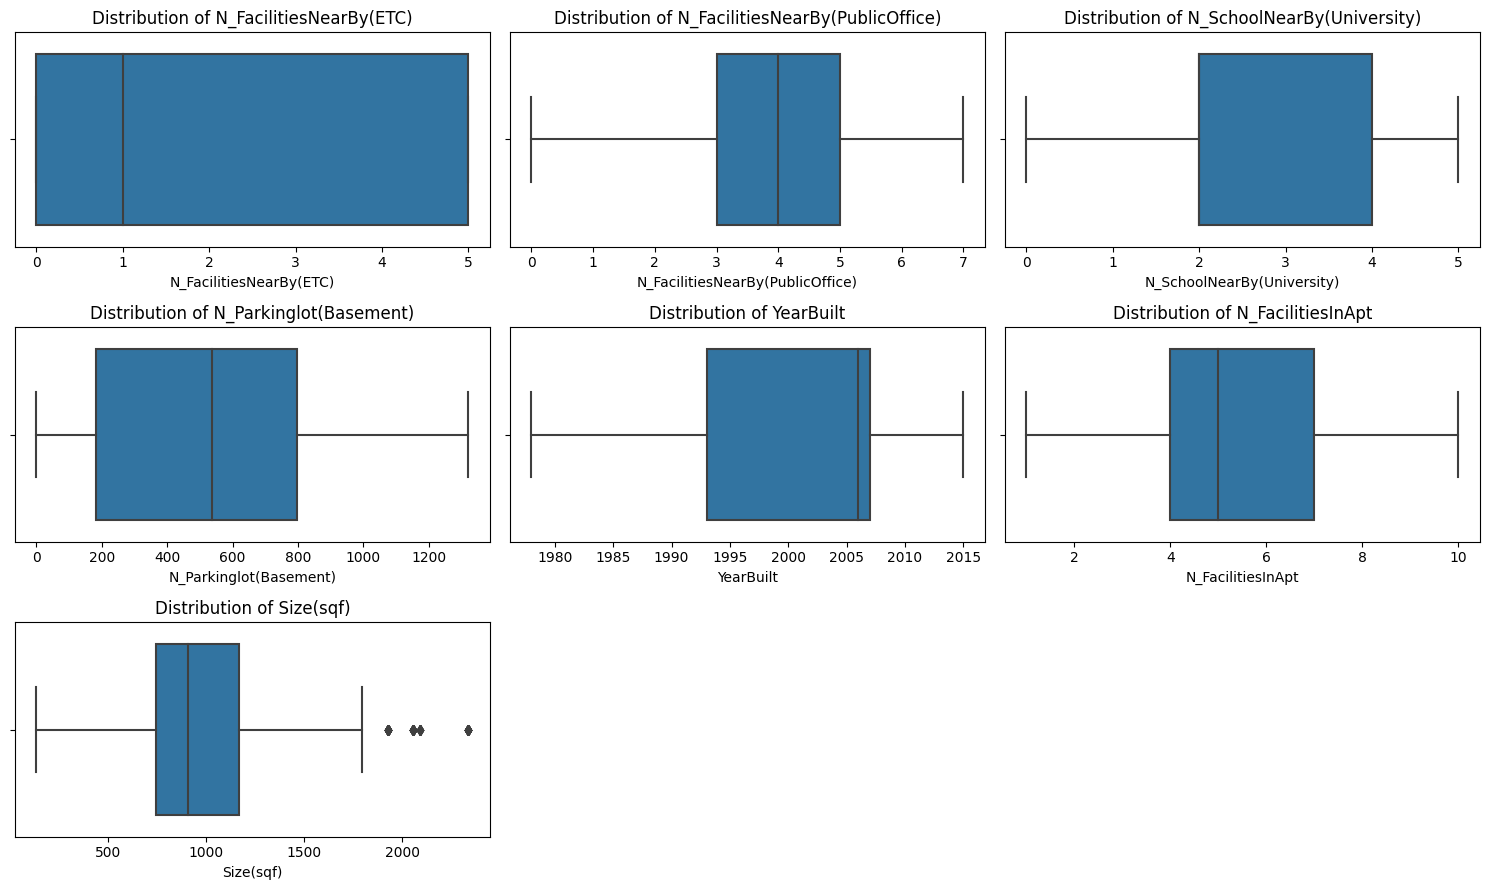

In [21]:
# boxplot dari kolom numerikal
numerical_features = df_model.drop(columns='SalePrice').describe().columns
plt.figure(figsize=  (15, 9))
ax = 1

for col in numerical_features:

    plt.subplot(3, 3, ax)
    sns.boxplot(data= df_model, x= col)
    plt.title(f'Distribution of {col}')
    ax += 1

plt.tight_layout()
plt.show()

In [22]:
numerical_features = df_model.describe().columns

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df_model[feature].quantile(0.75) - df_model[feature].quantile(0.25)
    lower_fence = df_model[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df_model[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df_model[df_model[feature]<lower_fence]))
    number_inside.append(len(df_model[(df_model[feature]>=lower_fence) & (df_model[feature]<=upper_fence)]))
    number_upper.append(len(df_model[df_model[feature]>upper_fence]))
    percentage_outlier.append(round((len(df_model[df_model[feature]<lower_fence]) + len(df_model[df_model[feature]>upper_fence])) / len(df_model)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,N_FacilitiesNearBy(ETC),-7.5,12.5,0,2701,0,0.00
1,N_FacilitiesNearBy(PublicOffice),0.0,8.0,0,2701,0,0.00
2,N_SchoolNearBy(University),-1.0,7.0,0,2701,0,0.00
3,N_Parkinglot(Basement),-744.5,1723.5,0,2701,0,0.00
4,YearBuilt,1972.0,2028.0,0,2701,0,0.00
5,N_FacilitiesInApt,-0.5,11.5,0,2701,0,0.00
6,Size(sqf),107.0,1803.0,0,2617,84,3.11
7,SalePrice,-67478.5,521901.5,0,2684,17,0.63


#### **Outlier pada kolom `SalePrice`**

In [23]:
# mengecek nilai-nilai price yang berada diatas upper fence
df_model[df_model['SalePrice'] > 521901.5]['SalePrice'].unique()

array([566371, 553097, 570796, 528318, 529203, 530973, 526548, 522123,
       585840, 527433, 557522, 556637], dtype=int64)

Tidak terdapat nilai `SalePrice` yang besarnya sangat ekstrim. Maka dari itu kita memutuskan untuk tidak menghapus outlier-outlier tersebut.

#### **Outlier pada kolom `Size(sqf)`**

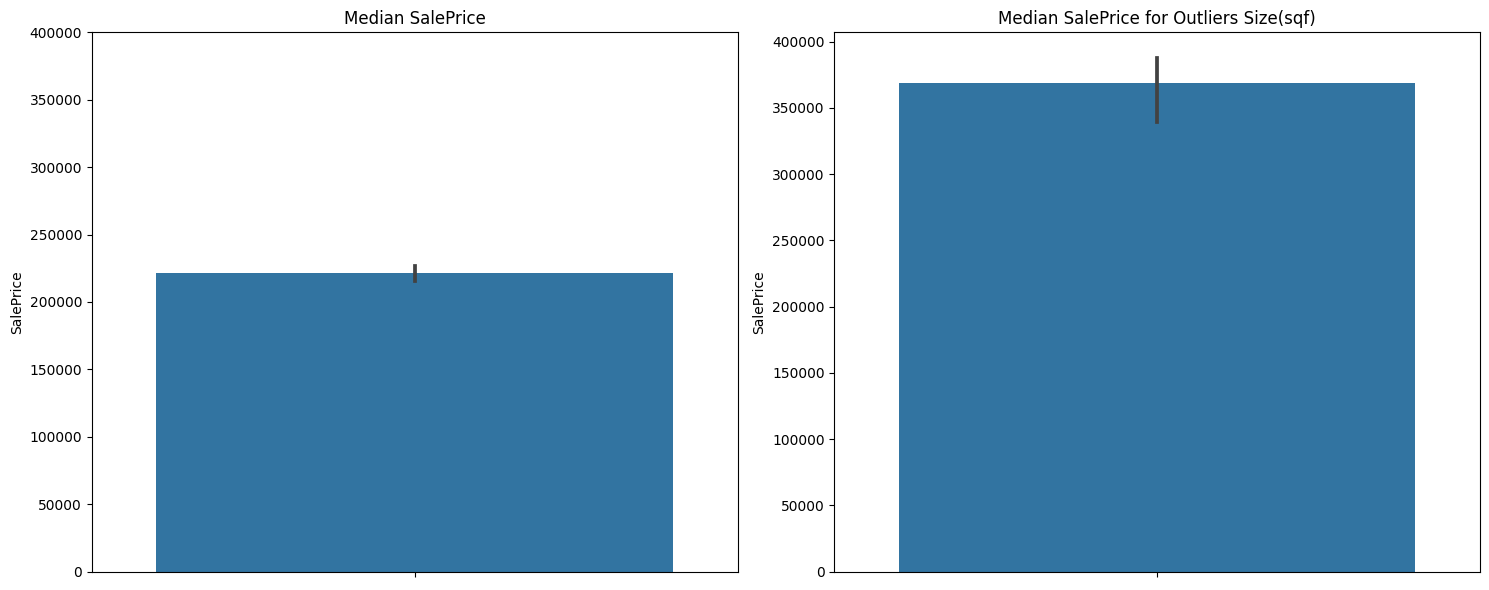

In [24]:
size_outlier = df_model[df_model['Size(sqf)'] > 1803]

plt.figure(figsize= (15, 6))

plt.subplot(1, 2, 1)
plt.title('Median SalePrice')
sns.barplot(data= df_model, y= 'SalePrice', estimator='median')
plt.yticks(range(0, 400001, 50000))

plt.subplot(1, 2, 2)
plt.title('Median SalePrice for Outliers Size(sqf)')
sns.barplot(data= size_outlier, y= 'SalePrice', estimator='median')
plt.yticks(range(0, 400001, 50000))

plt.tight_layout()
plt.show()

Berdasarkan gambar diatas, Terdapat perbedaan yang signifikan antara median `SalePrice` pada outlier kolom `Size(sqf)` dengan data pada `Size(sqf)` yang bukan outlier. Hal ini menunjukkan bahwa outlier-outlier tersebut merepresentasikan suatu perbedaan yang nantinya akan berguna pada tahap pemodelan. Maka dari itu kita tidak akan menghapus outlier tersebut.

### **Clean Dataset**

In [25]:
# Cek dataset yang sudah bersih
df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [26]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   HallwayType                       2701 non-null   object  
 1   TimeToSubway                      2701 non-null   category
 2   SubwayStation                     2701 non-null   object  
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64 
 5   N_SchoolNearBy(University)        2701 non-null   float64 
 6   N_Parkinglot(Basement)            2701 non-null   float64 
 7   YearBuilt                         2701 non-null   int64   
 8   N_FacilitiesInApt                 2701 non-null   int64   
 9   Size(sqf)                         2701 non-null   int64   
 10  SalePrice                         2701 non-null   int64   
dtypes: category(1), float64(4), int64(4), object(2)
memory usage:

In [27]:
# saving the clean dataset
# df_model.to_csv('data_daegu_apartement_clean.csv', index=False)

Pada akhirnya, tersisa 2701 baris data yang akan digunakan untuk pemodelan.

## **Data Analysis**

### **`HallwayType` vs `SalePrice`**

In [27]:
# Cek jumlah properti berdasarkan Hallway Type
print(f"\nJumlah apartemen berdasarkan hallway type:\n{df_model['HallwayType'].value_counts()}")


Jumlah apartemen berdasarkan hallway type:
HallwayType
terraced    1667
mixed        698
corridor     336
Name: count, dtype: int64


In [28]:
# Cek median price untuk tiap Hallway Type
median_price_hallway = df_model.groupby('HallwayType').agg({'SalePrice':'median'}).sort_values('SalePrice', ascending =False).reset_index()
median_price_hallway

,HallwayType,SalePrice
0,terraced,273451.0
1,mixed,161946.0
2,corridor,81415.0


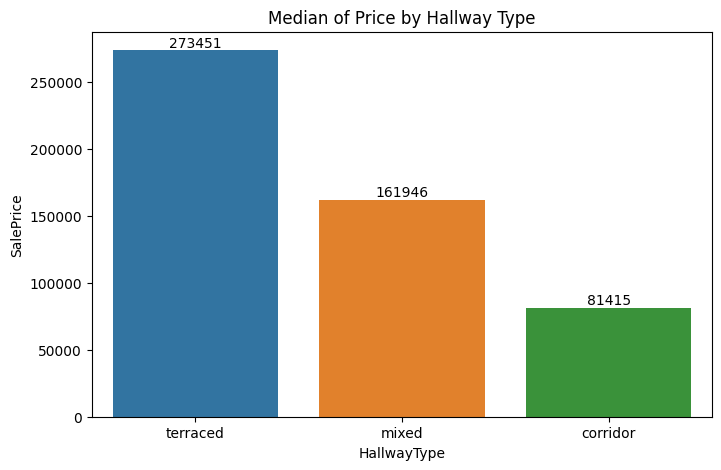

In [29]:
plt.figure(figsize= (8, 5))
ax = sns.barplot(data= df_model, x= 'HallwayType', y= 'SalePrice', estimator= 'median', ci=0)
ax.bar_label(ax.containers[0])
plt.title('Median of Price by Hallway Type')
plt.show()

Nilai median price tertinggi terdapat pada apartemen yang mempunyai hallway bertipe terraced yaitu diangka 273451, sedangkan apartemen yang mempunyai hallway bertipe corridor mempunyai median price terendah yaitu diangka 81415. 

Dari jumlah apartemen juga dapat dilihat bahwa apartemen yang mempunyai hallway bertipe terraced mempunyai proporsi paling besar, sedangkan apartemen yang mempunyai hallway bertipe corridor mempunyai proporsi paling kecil.

### **`TimeToSubway` vs `SalePrice`**

In [30]:
# Cek jumlah properti berdasarkan Time to Subway
print(f"\nJumlah apartemen berdasarkan time to subway:\n{df_model['TimeToSubway'].value_counts()}")


Jumlah apartemen berdasarkan time to subway:
TimeToSubway
0-5min              1248
10min-15min          434
15min-20min          418
5min-10min           413
no_subway_nearby     188
Name: count, dtype: int64


In [31]:
# Cek median price untuk tiap Hallway Type
median_price_time_to_subway = df_model.groupby('TimeToSubway').agg({'SalePrice':'median'}).sort_values('SalePrice', ascending =False).reset_index()
median_price_time_to_subway

,TimeToSubway,SalePrice
0,0-5min,290265.0
1,no_subway_nearby,236725.5
2,10min-15min,170796.0
3,5min-10min,158407.0
4,15min-20min,148672.0


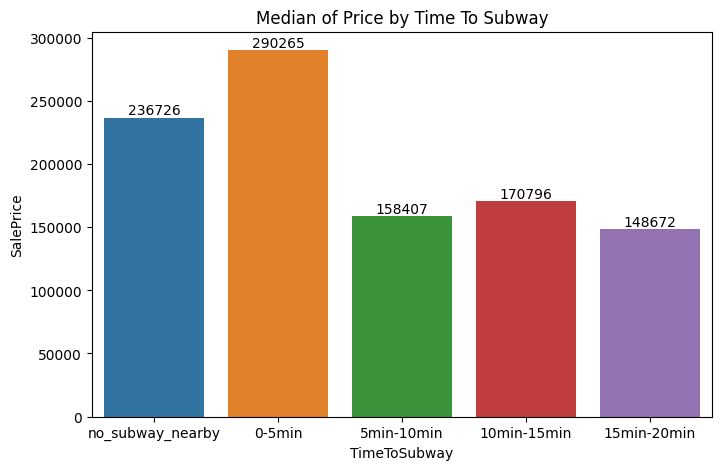

In [32]:
plt.figure(figsize= (8, 5))
ax = sns.barplot(data= df_model, x= 'TimeToSubway', y= 'SalePrice', estimator= 'median', ci=0)
ax.bar_label(ax.containers[0])
plt.title('Median of Price by Time To Subway')
plt.show()

Nilai median price tertinggi terdapat pada apartemen yang mempunyai jarak waktu ke subway sebesar 0-5 min yaitu diangka 290265, sedangkan apartemen yang mempunyai jarak waktu ke subway sebesar 5-10 min mempunyai median price terendah yaitu diangka 158407. 

### **`SubwayStation` vs `SalePrice`**

In [33]:
# Cek jumlah properti berdasarkan Subway terdekat
print(f"\nJumlah apartemen berdasarkan subway terdekat:\n{df_model['SubwayStation'].value_counts()}")


Jumlah apartemen berdasarkan subway terdekat:
SubwayStation
Myung-duk                709
Kyungbuk_uni_hospital    692
Sin-nam                  380
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64


In [34]:
# Cek median price untuk tiap apartemen berdasarkan subway terdekat
median_price_subway_station = df_model.groupby('SubwayStation').agg({'SalePrice':'median'}).sort_values('SalePrice', ascending =False).reset_index()
median_price_subway_station

,SubwayStation,SalePrice
0,Banwoldang,295575.0
1,Sin-nam,251327.0
2,Kyungbuk_uni_hospital,250884.5
3,no_subway_nearby,236725.5
4,Bangoge,179867.0
5,Myung-duk,165486.0
6,Daegu,93141.0
7,Chil-sung-market,92920.0


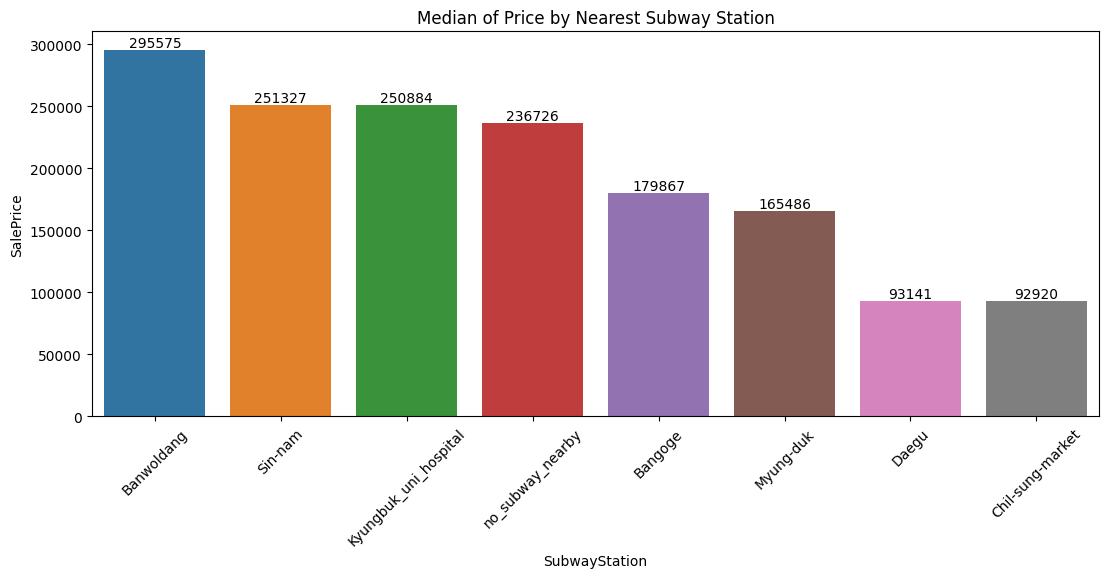

In [35]:
plt.figure(figsize= (13, 5))
ax = sns.barplot(data= df_model, x= 'SubwayStation', y= 'SalePrice', estimator= 'median', ci=0, order= median_price_subway_station['SubwayStation'])
ax.bar_label(ax.containers[0])
plt.title('Median of Price by Nearest Subway Station')
plt.xticks(rotation= 45)
plt.show()

Nilai median price tertinggi terdapat pada apartemen yang subway station terdekatnya merupakan Banwoldang yaitu diangka 295575, sedangkan apartemen yang subway station terderkatnya merupakan Chil-sung-market mempunyai median price terendah yaitu diangka 92920. 

### **`SubwayStation` and `TimeToSubway` vs `SalePrice`**

In [36]:
# Grouping tipe properti berdasarkan neighbourhood group
df_model.groupby(['TimeToSubway', 'SubwayStation'])['TimeToSubway'].count()

TimeToSubway      SubwayStation        
no_subway_nearby  Bangoge                    0
                  Banwoldang                 0
                  Chil-sung-market           0
                  Daegu                      0
                  Kyungbuk_uni_hospital      0
                  Myung-duk                  0
                  Sin-nam                    0
                  no_subway_nearby         188
0-5min            Bangoge                    0
                  Banwoldang               301
                  Chil-sung-market           0
                  Daegu                      0
                  Kyungbuk_uni_hospital    402
                  Myung-duk                212
                  Sin-nam                  333
                  no_subway_nearby           0
5min-10min        Bangoge                  280
                  Banwoldang                32
                  Chil-sung-market           0
                  Daegu                     54
                  Ky

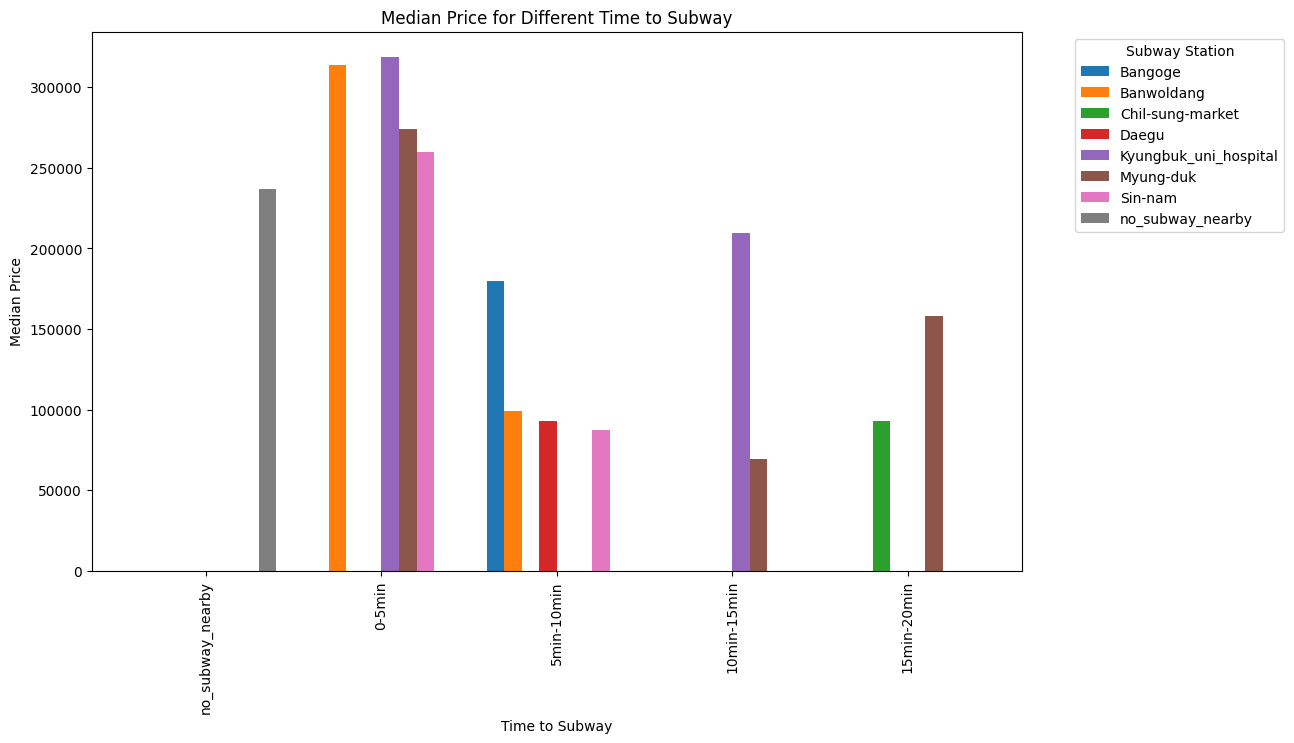

In [37]:
# Create a pivot table
neighbour_pivot = df_model.pivot_table(index='SubwayStation', columns='TimeToSubway', values='SalePrice', aggfunc='median').fillna(0)

# Transpose the pivot table to make TimeToSubway as columns
neighbour_pivot = neighbour_pivot.T

# Plot the data
pivot_plot = neighbour_pivot.plot.bar(stacked=False, figsize=(12, 7), width=0.8)  

# Adjust labels and title
pivot_plot.set_xlabel('Time to Subway')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price for Different Time to Subway')

# Adjust legend position
pivot_plot.legend(title='Subway Station', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Nilai median price tertinggi terdapat pada apartemen yang subway station terdekatnya merupakan Kyungbuk_uni_hospital dan jaraknya 0-5 min, sedangkan apartemen yang subway station terderkatnya merupakan Myung-duk dan jaraknya 10-15 min mempunyai median price terendah. 

### **`Facilities` vs `SalePrice`**

In [38]:
# Cek jumlah properti berdasarkan Subway terdekat
columns_fac = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt']
for col in columns_fac:
    print(f"\nJumlah apartemen berdasarkan {col}:\n{df_model[col].value_counts()}")


Jumlah apartemen berdasarkan N_FacilitiesNearBy(ETC):
N_FacilitiesNearBy(ETC)
0.0    1141
5.0     831
1.0     507
2.0     222
Name: count, dtype: int64

Jumlah apartemen berdasarkan N_FacilitiesNearBy(PublicOffice):
N_FacilitiesNearBy(PublicOffice)
5.0    701
3.0    591
2.0    387
7.0    340
6.0    276
1.0    241
4.0    137
0.0     28
Name: count, dtype: int64

Jumlah apartemen berdasarkan N_SchoolNearBy(University):
N_SchoolNearBy(University)
2.0    1025
5.0     551
1.0     545
4.0     357
3.0     154
0.0      69
Name: count, dtype: int64

Jumlah apartemen berdasarkan N_Parkinglot(Basement):
N_Parkinglot(Basement)
536.0     457
0.0       355
798.0     280
1270.0    269
524.0     164
475.0     152
1174.0    131
203.0     128
184.0     123
605.0     109
930.0      89
181.0      81
79.0       77
56.0       65
1321.0     60
18.0       47
76.0       41
108.0      32
218.0      28
400.0      13
Name: count, dtype: int64

Jumlah apartemen berdasarkan N_FacilitiesInApt:
N_FacilitiesInApt
4  

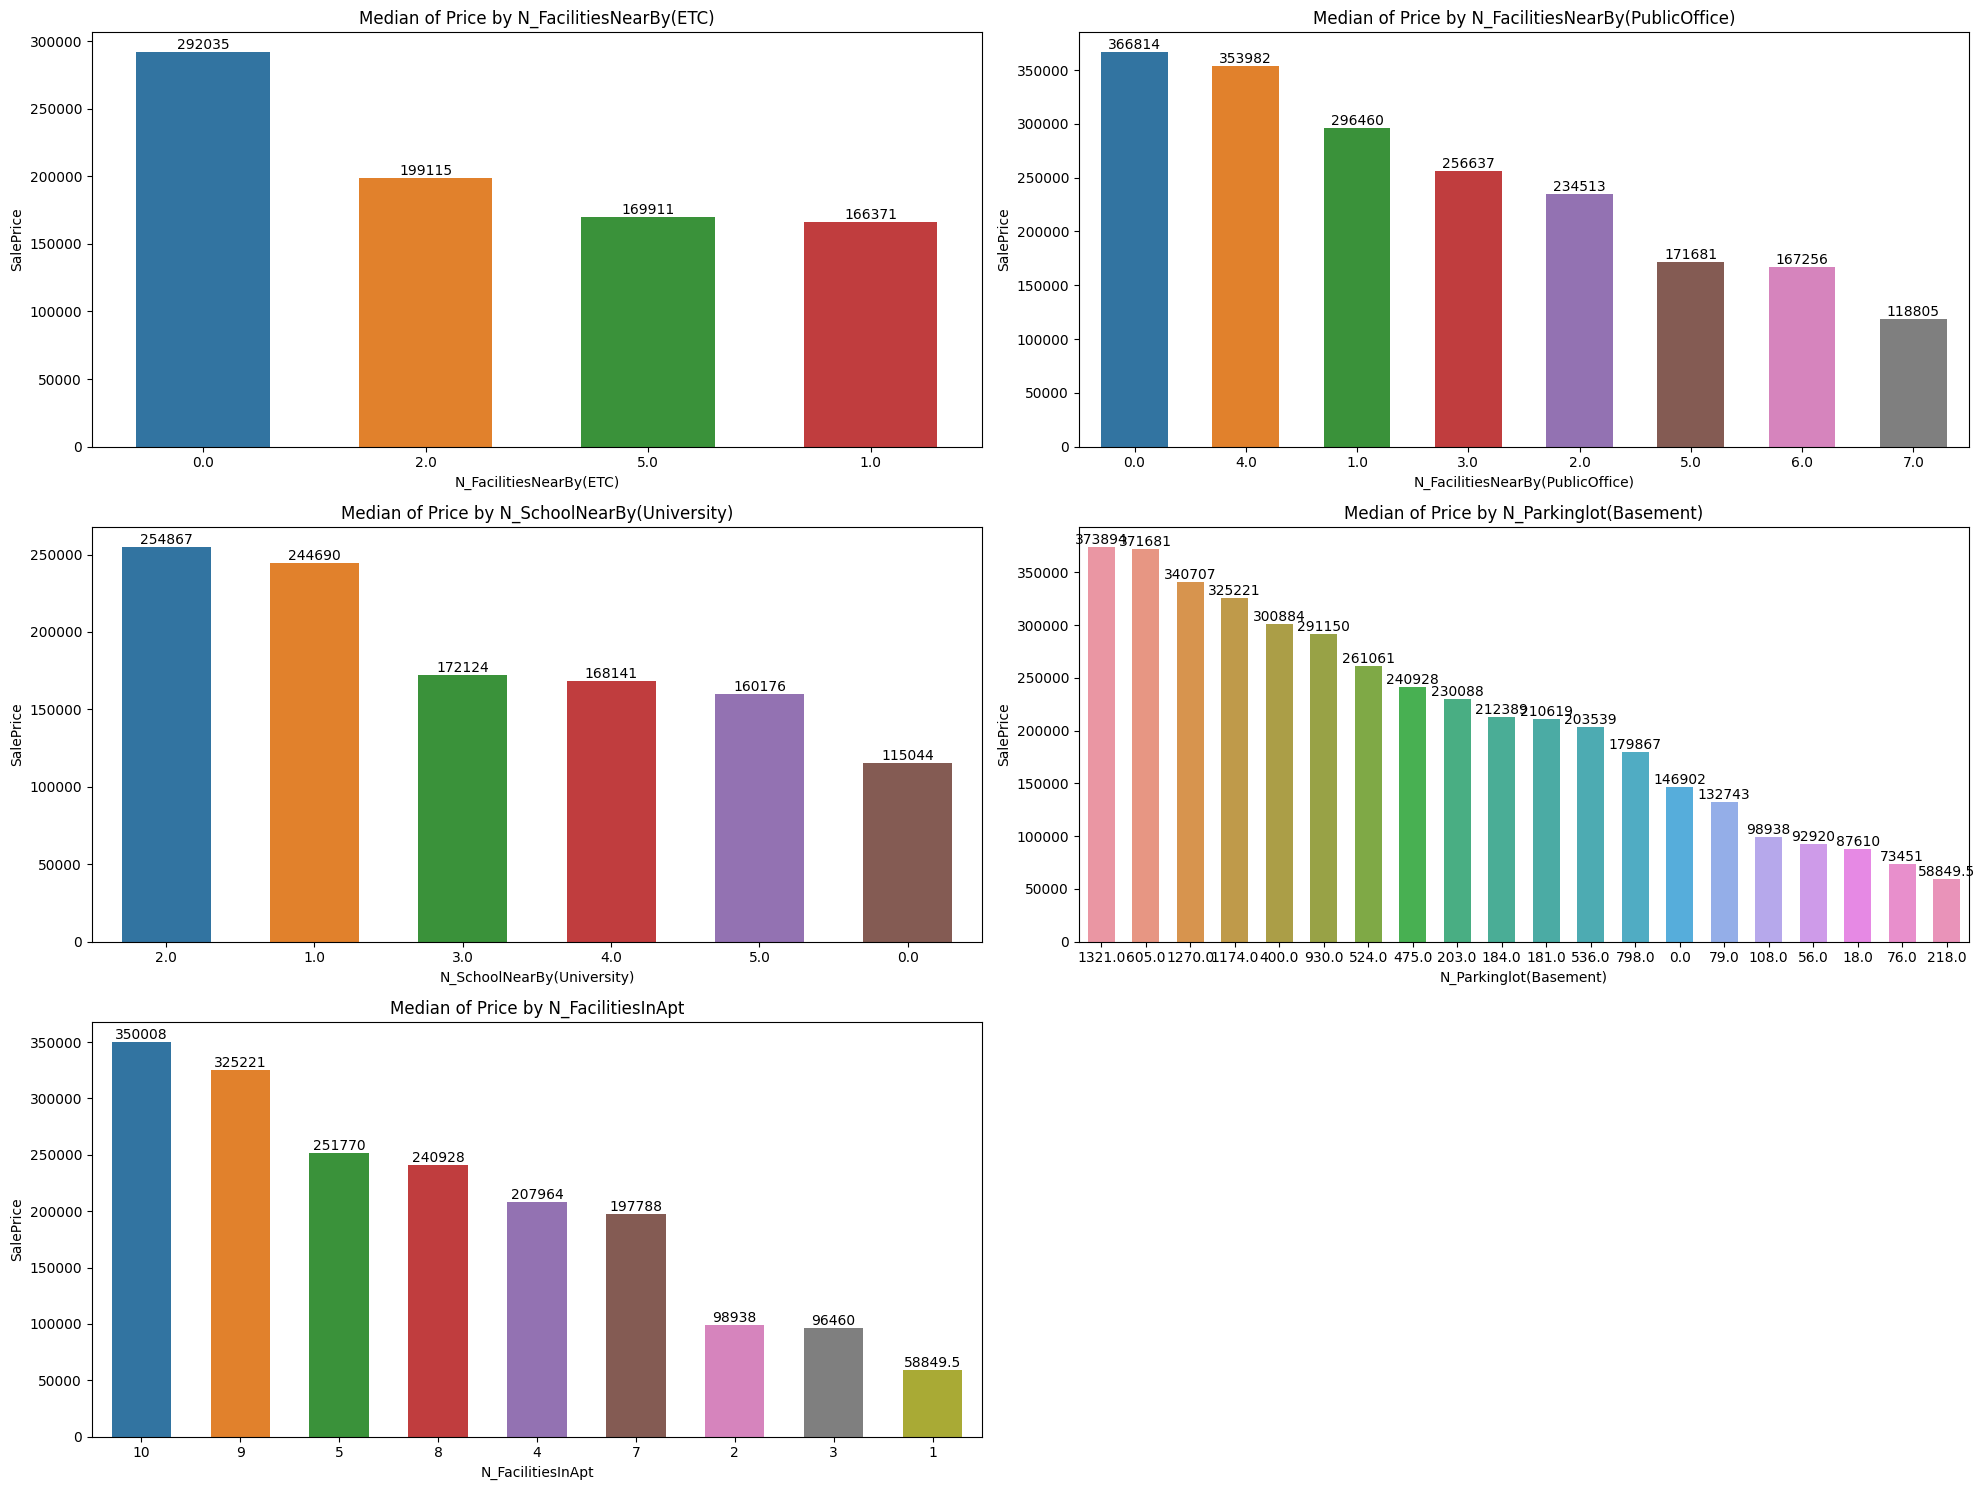

In [39]:
plt.figure(figsize= (20, 15))
ax= 1
for col in columns_fac:
    plt.subplot(3, 2, ax)
    axes = sns.barplot(data= df_model, x= col, y= 'SalePrice', estimator= 'median', ci=0, order= df_model.groupby(col)['SalePrice'].median().sort_values(ascending=False).index, width= 0.6)
    axes.bar_label(axes.containers[0])
    plt.title(f'Median of Price by {col}')
    ax+=1
    
plt.tight_layout()
plt.show()

#### **`YearBuilt` vs `SalePrice`**

In [40]:
# Cek jumlah properti berdasarkan tahun dibuat
print(f"\nJumlah apartemen berdasarkan tahun dibuatnya:\n{df_model['YearBuilt'].value_counts()}")


Jumlah apartemen berdasarkan tahun dibuatnya:
YearBuilt
2007    542
2006    385
2005    280
1993    276
1992    221
2014    215
1986    214
2008    152
2009    100
2013     89
2015     73
1997     58
1978     44
1985     41
2003      7
1980      4
Name: count, dtype: int64


In [41]:
# Cek median price untuk tiap apartemen berdasarkan tahun dibuat
median_price_year = df_model.groupby('YearBuilt').agg({'SalePrice':'median'}).sort_values('SalePrice', ascending =False).reset_index()
median_price_year

,YearBuilt,SalePrice
0,2015,354867.0
1,2007,320353.0
2,2014,305309.0
3,2013,291150.0
4,2006,242300.0
5,2008,240928.5
6,2009,205345.0
7,2005,179867.0
8,1986,176991.0
9,1993,167256.0


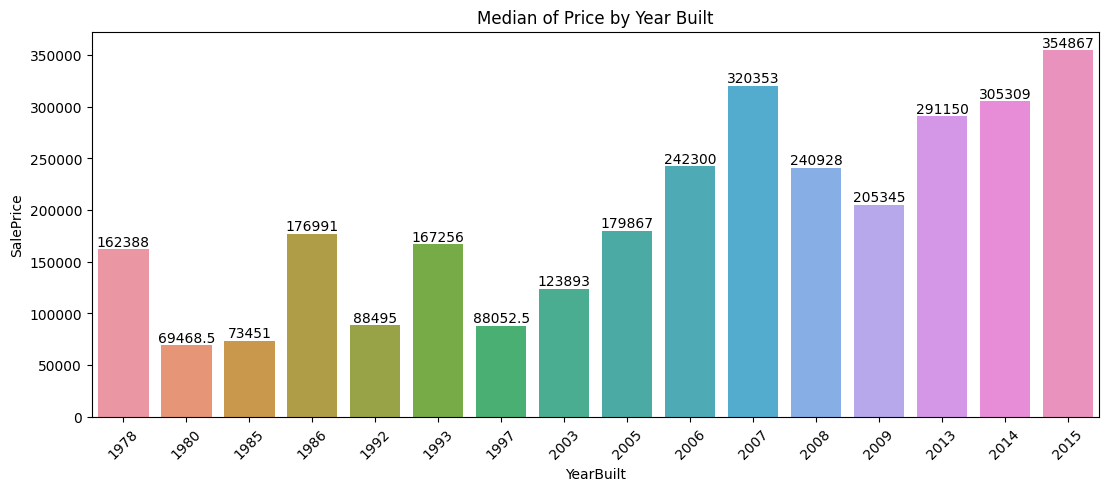

In [42]:
plt.figure(figsize= (13, 5))
ax = sns.barplot(data= df_model, x= 'YearBuilt', y= 'SalePrice', estimator= 'median', ci=0)
ax.bar_label(ax.containers[0])
plt.title('Median of Price by Year Built')
plt.xticks(rotation= 45)
plt.show()

Nilai median price tertinggi terdapat pada apartemen yang dibuat pada tahun 2015, sedangkan apartemen yang dibuat pada tahun 1980 mempunyai median price terendah. 

#### **`Size(sqf)` vs `SalePrice`**

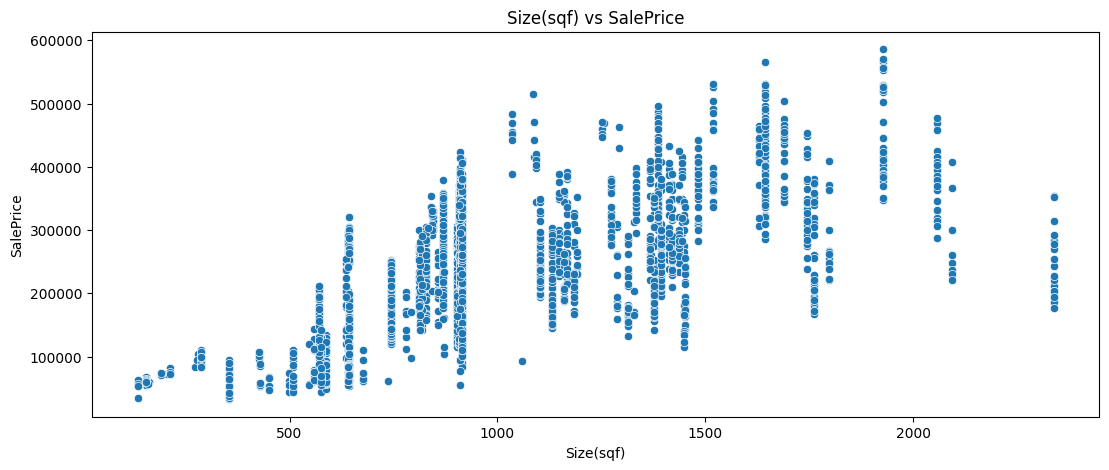

In [43]:
plt.figure(figsize= (13, 5))
sns.scatterplot(data= df_model, x= 'Size(sqf)', y= 'SalePrice')
plt.title('Size(sqf) vs SalePrice')
# plt.xticks(rotation= 45)
plt.show()

Berdasarkan gambar diatas, dapat dilihat bahwa nilai `SalePrice` cenderung naik seiring dengan naiknya nilai pada `Size(sqf)`.

#### **Correlation Matrix**

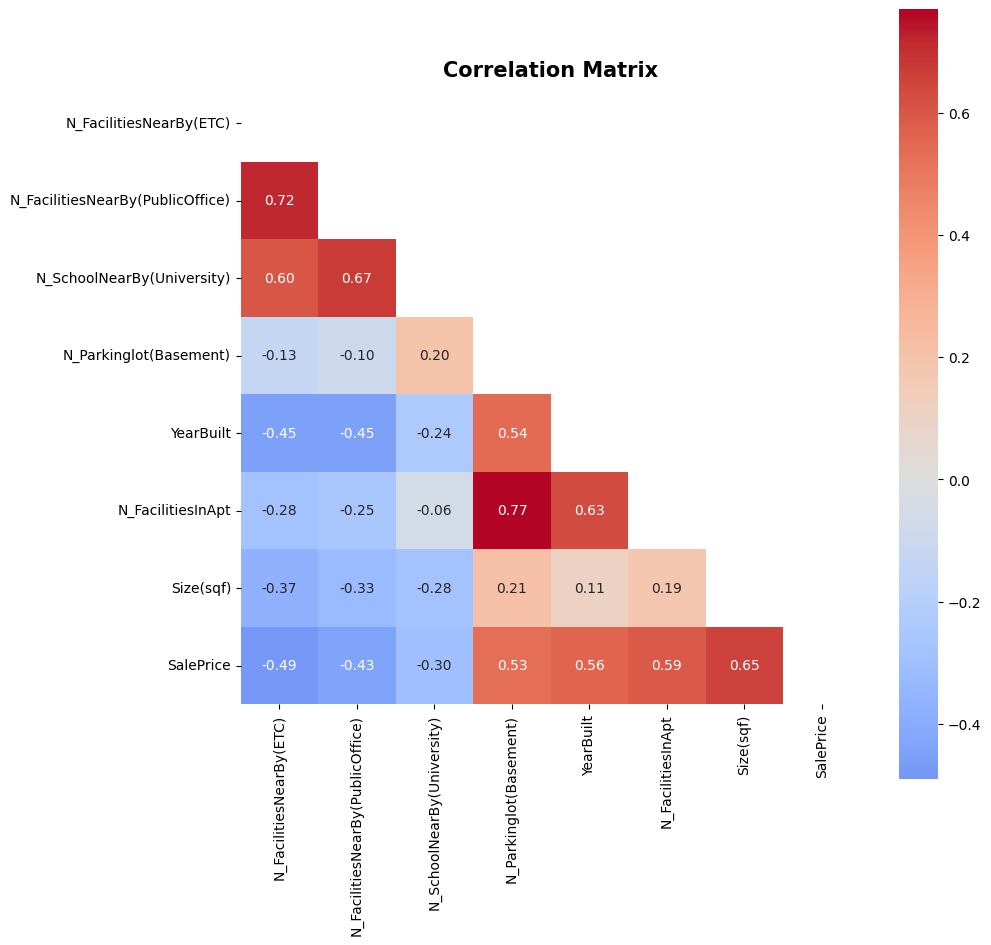

In [44]:
# Correlation matrix
plt.figure(figsize=(10,10))

matrix = np.triu(df_model.corr(method='spearman', numeric_only=True))

sns.heatmap(data=df_model.corr(method='spearman', numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Correlation matrix menunjukkan bahwa fitur Size(sqf) memiliki korelasi paling kuat terhadap fitur SalePrice. Ini menunjukkan bahwa semakin besar luas area dari suatu apartemen, maka semakin mahal juga harga jual apartemen tersebut.

Namun hampir semua fitur pada data ini mempunyai korelasi yang cukup kuat (moderate).

## **Modeling**

### **Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.
- `HallwayType` --> OneHotEncoding
- `TimeToSubway` --> OrdinalEncoding
- `SubwayStation` --> OneHotEncoding

In [45]:
ordinal_mapping = [
    {'col':'TimeToSubway', 'mapping':{'no_bus_stop_nearby':0, '0-5min':1, '5min-10min':2, '10min-15min':3, '15min-20min':4}}
]

In [46]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['HallwayType', 'SubwayStation']),
    ('ordinal', OrdinalEncoder(cols= ['TimeToSubway'], mapping=ordinal_mapping), ['TimeToSubway'])
],remainder='passthrough')

### **Define Features (X) and Target (y)**

In [47]:
X = df_model.drop(columns= 'SalePrice')
y = df_model['SalePrice']

### **Train and Test Splitting**

In [48]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=0)

### **Scaler**
Karena distribusi data dari fitur-fitur kita tidak mempunyai banyak outlier, maka kita akan memakai StandardScaler. Namun nantinya tetap akan dilakukan pemilihan scaler terbaik pada tahap hyperparameter tuning.

In [49]:
# define scaler
scaler = StandardScaler()

### **Benchmark Models**

Disini kita memilih untuk menggunakan 6 model, yaitu:
- Linear Regression
- KNN
- Decision Tree
- Random Forest
- XGBoost

Dari ke 5 model diatas, kita nantinya akan memilih 1 model terbaik

In [50]:
# algoritma
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(max_depth=5, random_state=0)

# random forest
rf = RandomForestRegressor(random_state=0)

# boosting
xgb = XGBRegressor(random_state=0)

In [51]:
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

### **Cross Validation**

In [52]:
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for model in models:

    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('modeling', model)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        pipe_model, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        pipe_model, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        pipe_model, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [53]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-54535.372119,1718.449436,-43737.089952,1242.518287,-0.216442,0.013123
1,KNN Regressor,-49981.124058,2354.176232,-39354.700799,1599.460049,-0.198124,0.012909
2,DecisionTree Regressor,-50166.087053,1915.395739,-39731.435631,1219.709015,-0.199456,0.009979
3,RandomForest Regressor,-46589.439663,1823.290439,-37180.921652,1058.980442,-0.187053,0.007800
4,XGBoost Regressor,-46528.461846,1695.541556,-37188.925349,979.658410,-0.186483,0.006685


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan RMSE dan MAPE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE, Random Forest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu RandomForest dan XGBoost. 

### **Predict to Test Set**

Prediksi pada test set dengan menggunakan model Random Forest dan XGBoost

In [54]:
models = {
    'RandomForest' : RandomForestRegressor(random_state=0),
    'XGB' : XGBRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set

for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

In [55]:
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,47349.635932,37648.833434,0.188431
XGB,46934.619486,37355.383816,0.184813


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE, MAE, dan MAPE yang sedikit lebih rendah dari Random Forest.

### **Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari Random Forest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [56]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
    }

In [57]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0, verbosity=0)

# Membuat pipeline
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [58]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'SubwayStation']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['TimeToSubway'],
                                                                                              mapping=[{'col': 'TimeToSubway',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping':...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [59]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
18,0.140804,0.012090,0.014323,0.002779,0.9,0.007743,177,2,0.83,10,...,1024.790424,4,-0.203510,-0.194988,-0.188108,-0.190718,-0.190756,-0.193616,0.005416,6
17,0.229375,0.012330,0.016927,0.001003,0.6,0.001,190,5,0.04,9,...,860.034516,3,-0.203633,-0.198091,-0.186642,-0.187751,-0.191427,-0.193509,0.006452,4
16,0.161720,0.006942,0.013796,0.001355,0.8,0.16681,190,3,0.48,9,...,898.847811,9,-0.204264,-0.197265,-0.185739,-0.187359,-0.190853,-0.193096,0.006844,2
7,0.294648,0.017671,0.027797,0.011232,0.9,0.059948,119,8,0.05,5,...,952.657539,1,-0.204351,-0.197957,-0.187086,-0.188169,-0.189417,-0.193396,0.006690,3
22,0.207572,0.021930,0.018772,0.003340,0.7,0.002783,155,4,0.25,8,...,835.652944,7,-0.203980,-0.199700,-0.187103,-0.189258,-0.191980,-0.194404,0.006409,15


In [60]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -46349.132002001075
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.007742636826811269, 'model__n_estimators': 177, 'model__max_depth': 2, 'model__learning_rate': 0.83, 'model__gamma': 10, 'model__colsample_bytree': 0.9}


### **Predict to Test Set with The Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [61]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=0)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,46441.501539,36846.123513,0.178472


### **Performance Comparisson**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning

In [62]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,46934.619486,37355.383816,0.184813


In [63]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,46441.501539,36846.123513,0.178472


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 46934, 37355, 0.184
- RMSE, MAE & MAPE setelah tuning: 46441, 36846, 0.178

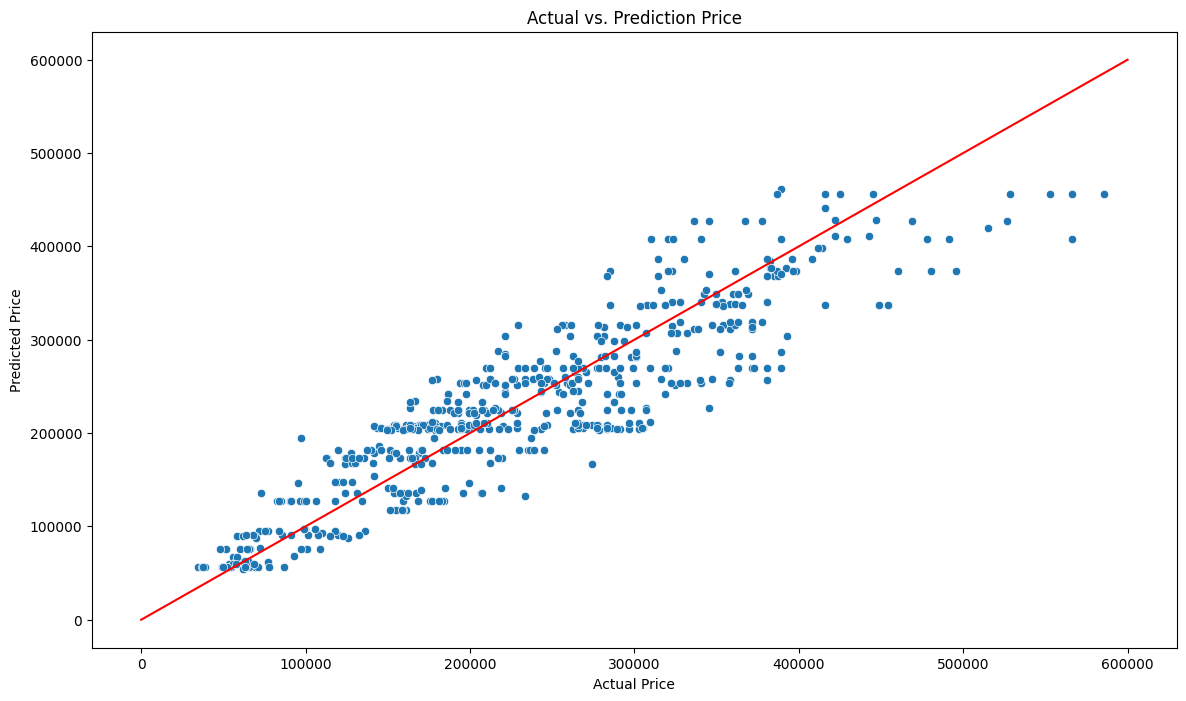

In [64]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')
sns.lineplot(x=range(0, 600001), y=range(0, 600001), color='red')
plt.show()

Dari grafik tersebut, dapat dilihat bahwa harga aktual dan harga yang diprediksi memiliki hubungan positif. Artinya, semakin tinggi harga aktual, semakin tinggi pula harga yang diprediksi. Namun, hubungan tersebut tidak linier sempurna. Ada beberapa titik yang berada di luar garis tren. Hal ini menunjukkan bahwa ada beberapa produk yang harganya tidak sesuai dengan prediksi, dengan estimasi rata-rata error diangka sekitar 17%. Namun secara keseluruhan, grafik ini menunjukkan bahwa model prediksi yang digunakan dapat memberikan prediksi yang cukup akurat.

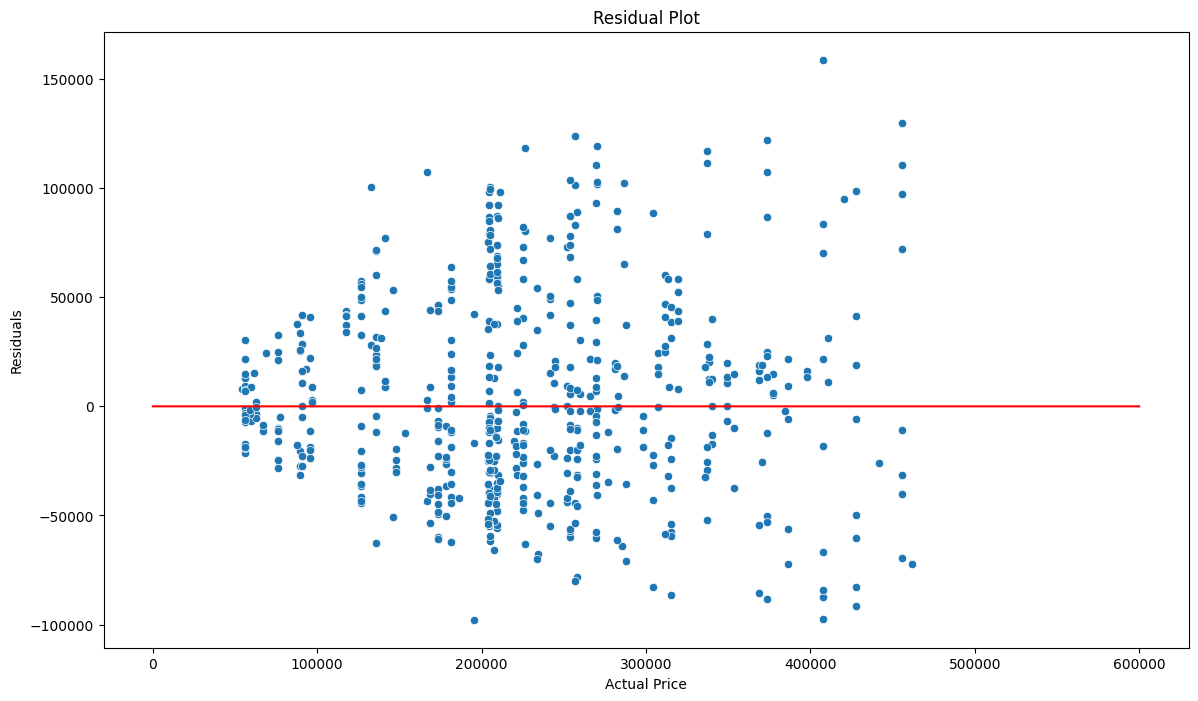

In [65]:
residuals = y_test - y_pred_xgb_tuning

plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_pred_xgb_tuning, y=residuals)
sns.lineplot(x= range(0, 600001), y= 0, color= 'red')
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()

Dari residual plot dapat dilihat bahwa saat memprediksi apartement yang harga aktualnya tinggi, model cenderung memberi prediksi yang lebih rendah (underestimation).

### **Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (SalePrice), kita dapat mengeceknya melalui function feature_importances_.

In [66]:
pd.DataFrame({
            'Feature' : transformer.get_feature_names_out(),
            'Importance' : xgb_tuning['model'].feature_importances_
            }).sort_values(by = 'Importance', ascending = False).head()

,Feature,Importance
1,onehot__HallwayType_terraced,0.915422
13,remainder__N_Parkinglot(Basement),0.024445
6,onehot__SubwayStation_Myung-duk,0.012582
16,remainder__Size(sqf),0.012376
14,remainder__YearBuilt,0.010077


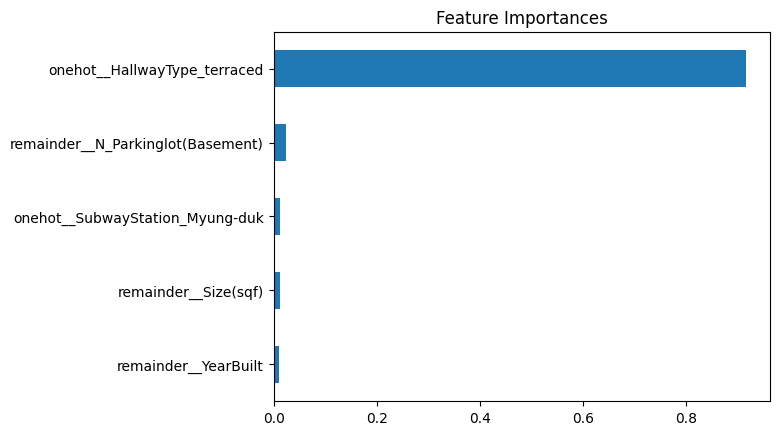

In [67]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp[::-1].plot(kind='barh', title='Feature Importances');

### **SHAP**

In [68]:
import shap

In [69]:
final_model = xgb_tuning
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType',
                                                   'SubwayStation']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['TimeToSubway'],
                                                                 mapping=[{'col': 'TimeToSubway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': no_bus_stop_nearby    0
0-5min                1
5min-10min            2
10min-15min           3
15min-20min           4
dtype: int64}]),
                                                  ['...
                              feature_types=None, gamma=10, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.83,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=2, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=177, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [70]:
# membuat data train yang dipreprocessing menggunakan encoding dan scaler
X_train_encod = final_model[:-2].fit_transform(X_train)

In [71]:
# membuat nama kolom
onehot_feature = list(final_model[0].transformers_[0][1].get_feature_names_out())
ordinal_feature = list(final_model[0].transformers_[1][1].get_feature_names_out())
remainder_feature = list(X_train.columns[final_model[0].transformers_[2][2]])
feature_names = onehot_feature + ordinal_feature + remainder_feature

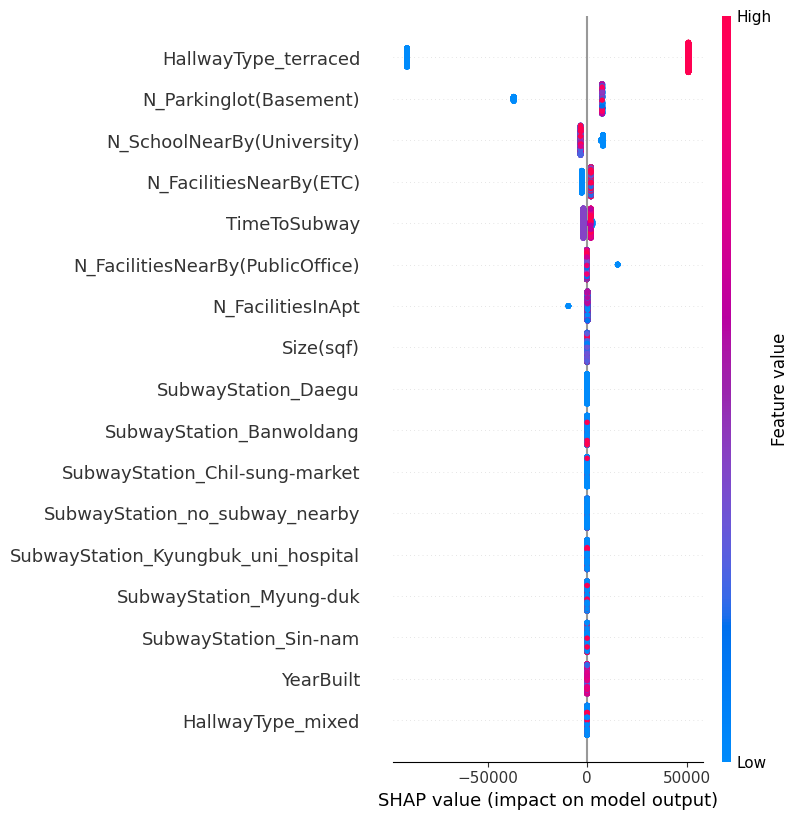

In [72]:
shap_values = shap.TreeExplainer(final_model[-1],                                           # model
                                 data = X_train_encod,                                    # data train dipreprocess
                                 feature_dependence="independent").shap_values(X_train_encod)
                                 
shap.summary_plot(shap_values, X_train_encod,feature_names = feature_names)

## **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur `HallwayType`, `N_Parkinglot(Basement)`, `SubwayStation`, `Size(sqf)`, dan `YearBuilt` menjadi 5 fitur yang paling berpengaruh terhadap target `SalePrice`.

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE, dan MAPE. Jika dilihat dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~17%, kita dapat menyimpulkan bahwa bila nanti model ini digunakan untuk memprediksi harga apartemen baru di Daegu pada rentang nilai seperti yang dilatih terhadap model (maksimal harga 585840 Won), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 17% dari harga seharusnya.

## **Recommendations**

Beberapa hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi:

1. Jika memungkinkan, penambahan fitur-fitur baru yang lebih korelatif dengan target ('SalePrice'). seperti jarak ke tempat penting (rumah sakit, supermarket, dan pusat perbelanjaan).

2. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks.

3. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update harga apartemen di Daegu dari tahun ke tahun.

Pertimbangan untuk prediksi yang underestimate dan overestimate:

1. Underestimate: Hal ini dapat berpengaruh kepada besarnya keuntungan yang didapat dari penjual apartement. Jika harga yang diprediksi lebih rendah dari harga aktualnya, maka besarnya keuntungan yang akan didapat dari penjualan apartemen tersebut juga akan lebih rendah.

2. Overestimate: Hal ini dapat mengurangi minatnya para pembeli untuk membeli apartemen tersebut karena harganya yang terlalu tinggi. Hal ini dapat mengakibatkan apartemen tersebut tidak terjual untuk waktu yang lama.

---

## **Save Model**

In [73]:
# Save model
import pickle

# best model
finalmodel = random_xgb.best_estimator_

# fitting model
finalmodel.fit(X_train, y_train)

# save
pickle.dump(finalmodel, open('Model_Daegu_Apartement_XGB.sav', 'wb'))

In [74]:
# # load model
# loaded_model = pickle.load(open('Model_Daegu_Apartement_XGB.sav', 'rb'))

In [75]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))